# 一般市民_どんな街になってほしいか

In [3]:
import pandas as pd
import csv
from pprint import pprint
import MeCab
import regex
import re
from collections import Counter

In [4]:
df = pd.read_csv("../subject/people.csv")
#問16
df16 = df.iloc[:,18:19].dropna(how='all')
df16

,問16
0,赤レンガパックだけでなく、商店街が活性化、人が集まるイベントを企画してほしいです。（シャッタ...
1,交流人口増加によるまちの活性
2,人にやさしい町
3,年老いても住みやすい街
4,・子育て世代と介護が必要な世代にやさしいまち
...,...
1076,だれにとっても居心地の良いまち
1078,ハード面では最新技術など利用して便利に、ソフト面では人と人とが通い共助できるようなまち
1079,居心地がいい街
1083,都会


In [5]:
class IndependentWord:
    def __init__(self):
        self.m = MeCab.Tagger("-d /usr/local/mecab/lib/mecab/dic/mecab-ipadic-neologd/")
#         self.kanaalpha = regex.compile(r'[\p{Script=Hiragana}\p{Script=Katakana}ーA-Za-z]')
        self.kanaalpha = regex.compile(r'[\p{Script=Hiragana}ーA-Za-z]+')
        self.number = regex.compile('[0-9０-９]+')

    class Constant:
        BASIC = "basic_form" #原型
        SURFACE = "surface_form" #表層型
        POS = "pos" #品詞
        POS_DETAIL_1 = "pos_detail_1" #品詞詳細1
        POS_DETAIL_2 = "pos_detail_2" #品詞詳細2
        POS_DETAIL_3 = "pos_detail_3" #品詞詳細3
        PRONUNCIATION = "pronunciation" #発音
        READING = "reading" #読み
        CONJUGATED_TYPE = "conjugated_type" #活用
        CONJUGATED_FORM = "conjugated_form" #活用形

  #mecabの出力行をobjectに変換
  #mecabの出力フォーマットに応じて適宜修正する
    def mecabLineToDict(self, line):
        surface, tmp = line.split("\t")
        others = tmp.split(",")
    
        Const = self.Constant

        return {
            Const.SURFACE: surface,
            Const.POS: others[0],
            Const.POS_DETAIL_1: others[1],
            Const.POS_DETAIL_2: others[2],
            Const.POS_DETAIL_3: others[3],
            Const.CONJUGATED_TYPE: others[4],
            Const.CONJUGATED_FORM: others[5],
            Const.BASIC: others[6],
            Const.READING: others[7],
            Const.PRONUNCIATION: others[8]
        }
#自立語かどうかの判定
    def isIndependentWord(self, token):
        pos = token[self.Constant.POS]
        pos_detail_1 = token[self.Constant.POS_DETAIL_1]
        if pos == "名詞" and pos_detail_1 in ['一般','固有名詞','サ変接続','形容動詞語幹']: #用途によっては「副詞可能」を足しても良いかもしれません
            return True
        elif pos == '形容詞' and pos_detail_1 == '自立':
            return True
        elif pos == "副詞" and pos_detail_1 == "一般":
            return True
        elif pos == "動詞" and pos_detail_1 == "自立":
            return True
        else:
            return False
        
  #カナやアルファベット１文字や数字出ないかの判定
    def isReliableWord(self, token):
        surface = token[self.Constant.SURFACE]
        if self.number.fullmatch(surface):
            return False
        elif self.kanaalpha.fullmatch(surface):
            return False
        else:
            return True

  #自立語の原型を抽出
    def extract(self,text):
        lines = self.m.parse(text).splitlines()[:-1]
        tokens = [self.mecabLineToDict(line) for line in lines]

        independent_words = []
        for token in tokens:
            if self.isIndependentWord(token) and self.isReliableWord(token):
#             if self.isIndependentWord(token):
                surface = token[self.Constant.SURFACE]
                basic = token[self.Constant.BASIC]
                if basic == "*":
                    independent_words.append(surface)
                else:
                    independent_words.append(basic)
        return independent_words

In [6]:
df = pd.read_csv("../subject/people.csv")
#問16
df16 = df.iloc[:,18:19].dropna(how='all')
df16

,問16
0,赤レンガパックだけでなく、商店街が活性化、人が集まるイベントを企画してほしいです。（シャッタ...
1,交流人口増加によるまちの活性
2,人にやさしい町
3,年老いても住みやすい街
4,・子育て世代と介護が必要な世代にやさしいまち
...,...
1076,だれにとっても居心地の良いまち
1078,ハード面では最新技術など利用して便利に、ソフト面では人と人とが通い共助できるようなまち
1079,居心地がいい街
1083,都会


In [7]:
list = []
# .replace('','')

for i in df16["問16"]:
    i = re.sub('[0-9.,０-９．，]|[a-zA-Z]|%|~|〜|', '', i)
#     s = i.lstrip('・').replace('/','').replace('(','').replace(')','').replace('\u3000','').replace('TNR','').replace('ー10％','').replace('1H30min~2H','').replace('マイナス30％','').replace('100','').replace('20％','').replace('Society5.0やSDFGs','').replace('R27','')
    s = i.lstrip('・').replace('パーツ','').replace('シャッター','').replace('デコボコ','').replace('ドンキーホーテ','').replace('ブックオフ','').replace('（','').replace('）','').replace('/','').replace('(','').replace(')','').replace('\u3000','').replace('Society5.0','').replace('R27','').replace('ー10％','').replace('1H30min~2H','').replace('~','').replace('-','').replace('%','').replace('･','').replace('!','').replace('ベビカー','').replace('～','').replace('キャンプ','').replace('イオン','')
    list.append(s)
# print(list)

# 実行
res = []
if __name__ == "__main__":
    for i in list:
        idptwd = IndependentWord()
        result = idptwd.extract(i)
        res.append(result)


# ストップワード
stop = ['街', 'まち', '町', '住む', '人', 'ひと', '舞鶴', '思う']
words = []

for i in res:
    for t in i:
        if t not in stop:
            words.append (t)

('活気', 82)
('若者', 70)
('安心', 51)
('充実', 51)
('来る', 51)
('観光', 47)
('場所', 46)
('若い人', 43)
('増える', 41)
('自然', 40)
('多い', 37)
('良い', 35)
('医療', 35)
('働く', 31)
('交通', 31)
('出来る', 30)
('子供', 29)
('市', 29)
('人口', 28)
('企業', 27)
('思える', 26)
('発展', 26)
('行く', 25)
('福祉', 24)
('生活', 24)
('施設', 23)
('高齢者', 23)
('都会', 23)
('市外', 22)
('店', 22)
('商店街', 21)
('力', 21)
('魅力', 21)
('子ども', 21)
('地元', 20)
('帰る', 20)
('楽しい', 19)
('明るい', 19)
('子育て', 18)
('若い', 18)
('子供達', 18)
('働ける', 18)
('海', 18)
('世代', 17)
('地域', 17)
('作る', 17)
('便', 16)
('優しい', 16)
('田舎', 16)
('豊か', 15)
('人達', 15)
('市民', 15)
('イベント', 14)
('観光客', 14)
('増やす', 14)
('暮らせる', 14)
('入れる', 14)
('便利', 14)
('誘致', 13)
('元気', 13)
('仕事', 13)
('教育', 13)
('商業施設', 13)
('安全', 13)
('老人', 12)
('移住', 12)
('京都', 12)
('出る', 12)
('知る', 12)
('心', 11)
('持つ', 11)
('病院', 11)
('他', 11)
('利用', 11)
('産業', 11)
('進学', 11)
('過ごせる', 11)
('買い物', 11)
('楽しめる', 11)
('活性化', 10)
('増加', 10)
('雇用', 10)
('定住', 10)
('特に', 10)
('考える', 10)
('言う', 10)
('活性', 9)
('期待', 9)
('安い', 9)
('

In [8]:
list[len(res):(len(res) + 1)]
# len(res)
# list[719:720]

[]

In [9]:
# 確かめるやつ

text = \
'今日はいい天気'

res = []
if __name__ == "__main__":
    idptwd = IndependentWord()
    result = idptwd.extract(text)
    res.append(result)
result

['天気']

In [10]:
result = ' '.join(s for s in words)
result

'赤レンガ パック 商店街 活性化 集まる イベント 企画 商店街 蘇 新幹線 通る 交流人口 増加 活性 年老いる 子育て 世代 介護 必要 世代 稼ぎ 出す 力 ジリ貧 コンパクトシティー 豊か 街づくり 期待 世代 満足 若い 人達 新しい チャレンジ 子供達 西舞鶴 元気な町 観光客 誘致 増やす 街中 足 運ぶ 魅力 発信 税金 少ない 金持ち 心 民家 アート インスタ映え 嬉しい 誇り 感じる 地元 企業 元気 治安 良い 物価 安い 人情 溢れる 商店街 活気 若者 魅力 持つ 特徴 生かす 売り出せる 地元 郊外 行く 思える 施設 若者 残る 街づくり 期待 子供 老人 楽しい 遊べる 公園 安心 年寄 集える 場所 移住 定 促進 雇用 充実 高齢者 現役 世代 安心 暮らせる 医療 介護 福祉 充実 願う 子供 年寄り 市民 安心 暮らせる 快適 生活環境 防犯 防災 活気 商店街 活性化 子ども 高齢者 観光 入る イベント 開催 感じ イメージ 閉鎖 感じ 好き 何事 平凡 豊か 医療 充実 学校 崩壊 北近畿 リーダー 病院 綾部 福知山 救急 盥回し 受入 拒否 綾部市民 病院 行く 医療面 盥回し 受入 拒否 医療 安心 子育て 全国 先駆ける コンパクトシティ 促進 具体 上手 子供 孫 温かい ターン 定住 人口 維持 増加 魅力 官民 一体 観光資源 民間 活用 地元 含める 導入 観光都市 魅力 アップ 期待 京阪神 直結 市 活気 他 市 ブラント 間人ガニ 食べ物 インパクト 若者 高齢者 満足 共存 面白い 人口 増える 特に 若者 増える 西 中 東 分かれる 北部 都市 発展 意識 一つ 街づくり 考える 中心部 地区 気軽 行ける ショッピングセンター コミュニティセンター 欲しい 物心 豊か 歴史 引き継ぐ 休み 思える 市外 住民 若者 盛ん 楽しさ 増える ズバリ 福知山 見習う 離れる 多い 帰る 高齢化 進む 安心 暮らせる 若い世代 働ける 企業 多い 発展 地元 施設 店 利用 出来る 市 駐車場 多い ポイント 置 特典 地域 利用 人口 万人 越える 若者 好き 他府県 観光 来る 建物 少ない 増やす 企業 積極 誘致 若者 働ける 老人 医療 子供 医療 力 入れる 福祉 力 個々 学力 安

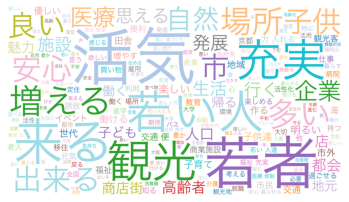

In [14]:
#ワードクラウドの作成
from matplotlib import pyplot as plt
from wordcloud import WordCloud
 
# w = WordCloud(background_color="white", width=600, height=400, min_font_size=15)


wc = WordCloud(
    font_path = '~/Library/Fonts/ヒラギノ角ゴシック W3.ttc',
    width=1920, 
    height=1080,
    prefer_horizontal=1,
    background_color='white',
    include_numbers=True,
    colormap='tab20',
    regexp=r"[\w']+",
    ).generate_from_text(result)

plt.imshow(wc)
plt.axis("off")
plt.show()
wc.to_file('./gen_16.png')

In [12]:
# 頻出単語を出力
mine = Counter(words)
for i in mine.most_common():
    print(i)

# values, counts = zip(*mine.most_common())
# values
# counts

('活気', 82)
('若者', 70)
('安心', 51)
('充実', 51)
('来る', 51)
('観光', 47)
('場所', 46)
('若い人', 43)
('増える', 41)
('自然', 40)
('多い', 37)
('良い', 35)
('医療', 35)
('働く', 31)
('交通', 31)
('出来る', 30)
('子供', 29)
('市', 29)
('人口', 28)
('企業', 27)
('思える', 26)
('発展', 26)
('行く', 25)
('福祉', 24)
('生活', 24)
('施設', 23)
('高齢者', 23)
('都会', 23)
('市外', 22)
('店', 22)
('商店街', 21)
('力', 21)
('魅力', 21)
('子ども', 21)
('地元', 20)
('帰る', 20)
('楽しい', 19)
('明るい', 19)
('子育て', 18)
('若い', 18)
('子供達', 18)
('働ける', 18)
('海', 18)
('世代', 17)
('地域', 17)
('作る', 17)
('便', 16)
('優しい', 16)
('田舎', 16)
('豊か', 15)
('人達', 15)
('市民', 15)
('イベント', 14)
('観光客', 14)
('増やす', 14)
('暮らせる', 14)
('入れる', 14)
('便利', 14)
('誘致', 13)
('元気', 13)
('仕事', 13)
('教育', 13)
('商業施設', 13)
('安全', 13)
('老人', 12)
('移住', 12)
('京都', 12)
('出る', 12)
('知る', 12)
('心', 11)
('持つ', 11)
('病院', 11)
('他', 11)
('利用', 11)
('産業', 11)
('進学', 11)
('過ごせる', 11)
('買い物', 11)
('楽しめる', 11)
('活性化', 10)
('増加', 10)
('雇用', 10)
('定住', 10)
('特に', 10)
('考える', 10)
('言う', 10)
('活性', 9)
('期待', 9)
('安い', 9)
('

In [15]:
len(words)

4411